In [1]:
import os
import glob
import datetime
import statistics
import numpy as np
import pandas as pd
import import_ipynb
from marcap import marcap_data
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [2]:
from qp import get_stocks # 1/PBR + GP/A
#from ncav import get_stocks # NCAV

importing Jupyter notebook from qp.ipynb
importing Jupyter notebook from common.ipynb


In [17]:
MODEL_NAME = 'qp-inc-cap'
DATA_DIR = 'data/daily/12-1'

In [18]:
df_account = pd.DataFrame(columns=['start_date', 'end_date', 'filepath'])
filepaths = glob.glob(DATA_DIR + "/*.csv")
filepaths = sorted(filepaths)

days = []
for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date =  os.path.basename(filepaths[i])[:-4]
        end_date =  os.path.basename(filepaths[i + 1])[:-4]
        
        day = {'start_date':start_date, 'end_date':end_date, 'filepath':filepaths[i]}
        days.append(day)

df_account = df_account.append(days)

In [19]:
df_account

,start_date,end_date,filepath
0,2002-12-02,2003-12-01,data/daily/12-1/2002-12-02.csv
1,2003-12-01,2004-12-01,data/daily/12-1/2003-12-01.csv
2,2004-12-01,2005-12-01,data/daily/12-1/2004-12-01.csv
3,2005-12-01,2006-12-01,data/daily/12-1/2005-12-01.csv
4,2006-12-01,2007-12-03,data/daily/12-1/2006-12-01.csv
5,2007-12-03,2008-12-01,data/daily/12-1/2007-12-03.csv
6,2008-12-01,2009-12-01,data/daily/12-1/2008-12-01.csv
7,2009-12-01,2010-12-01,data/daily/12-1/2009-12-01.csv
8,2010-12-01,2011-12-01,data/daily/12-1/2010-12-01.csv
9,2011-12-01,2012-12-03,data/daily/12-1/2011-12-01.csv


In [20]:
# 연도별 종목을 구한다.
df_account['stocks'] = df_account.apply(lambda x: get_stocks(x.filepath, x.start_date), axis=1)

------------------------------
2002-12-02 data/daily/12-1/2002-12-02.csv
전체 1576
지주사, 금융사 제외 1477


common.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "\n",


국외주식 제외 1477
증자기업 제외 1377
가격정보 없는 기업 제외 984
선정 기업 수 30
------------------------------
2003-12-01 data/daily/12-1/2003-12-01.csv
전체 1668
지주사, 금융사 제외 1569
국외주식 제외 1569
증자기업 제외 1474
가격정보 없는 기업 제외 1053
선정 기업 수 30
------------------------------
2004-12-01 data/daily/12-1/2004-12-01.csv
전체 1716
지주사, 금융사 제외 1614
국외주식 제외 1614
증자기업 제외 1496
가격정보 없는 기업 제외 1082
선정 기업 수 30
------------------------------
2005-12-01 data/daily/12-1/2005-12-01.csv
전체 1812
지주사, 금융사 제외 1708
국외주식 제외 1707
증자기업 제외 1613
가격정보 없는 기업 제외 1169
선정 기업 수 30
------------------------------
2006-12-01 data/daily/12-1/2006-12-01.csv
전체 1861
지주사, 금융사 제외 1754
국외주식 제외 1752
증자기업 제외 1604
가격정보 없는 기업 제외 1181
선정 기업 수 30
------------------------------
2007-12-03 data/daily/12-1/2007-12-03.csv
전체 1952
지주사, 금융사 제외 1841
국외주식 제외 1835
증자기업 제외 1699
가격정보 없는 기업 제외 1270
선정 기업 수 30
------------------------------
2008-12-01 data/daily/12-1/2008-12-01.csv
전체 2046
지주사, 금융사 제외 1930
국외주식 제외 1920
증자기업 제외 1762
가격정보 없는 기업 제외 1299
선정 기업 수 30
---------------------

In [21]:
# 연도별 수익률을 구한다.
df_account['yield'] = 0.0
df_account['yields'] = 0.0
df_account['yields'] = df_account['yields'].astype('object')

for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date = df_account.iloc[i].start_date
        end_date = df_account.iloc[i].end_date
        
        df_this_year = pd.read_csv(filepaths[i], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        df_next_year = pd.read_csv(filepaths[i + 1], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        
        stocks = df_account.iloc[i].stocks   
        yields = []
        
        # 종목별 수익률을 구한다.
        for stock in stocks:
            start_price = df_this_year[df_this_year['종목코드'] == stock]['주가'].iloc[0]
            end_price = df_next_year[df_next_year['종목코드'] == stock]['주가']
            
            if len(end_price) == 0:
                end_price = 0
            else:                    
                end_price = end_price.fillna(0) # 가격 정보가 없을 경우 상폐
                end_price = end_price.iloc[0]
            
            # get yield
            yields.append(end_price / start_price)

        # stock 수익률들의 avg가 total 수익률이 된다. (동일 비중이기 때문에)
        mean_yields = statistics.mean(yields)
        df_account.at[i, 'yield'] = mean_yields
        df_account.at[i, 'yields'] = yields
        
        print(start_date, '~', end_date, ":", mean_yields)
        
        #break

2002-12-02 ~ 2003-12-01 : 1.053622702246627
2003-12-01 ~ 2004-12-01 : 1.3512619572468607
2004-12-01 ~ 2005-12-01 : 2.7905690873959155
2005-12-01 ~ 2006-12-01 : 1.0740168651032043
2006-12-01 ~ 2007-12-03 : 1.890740761809089
2007-12-03 ~ 2008-12-01 : 0.628622009566269
2008-12-01 ~ 2009-12-01 : 2.470220789018181
2009-12-01 ~ 2010-12-01 : 1.4513090138060363
2010-12-01 ~ 2011-12-01 : 1.1025152196468133
2011-12-01 ~ 2012-12-03 : 1.5319688443755974
2012-12-03 ~ 2013-12-02 : 1.108009353731549
2013-12-02 ~ 2014-12-01 : 1.3279676861138852
2014-12-01 ~ 2015-12-01 : 2.1209232815411214
2015-12-01 ~ 2016-12-01 : 1.3434831020771085
2016-12-01 ~ 2017-12-01 : 1.357263565195496
2017-12-01 ~ 2018-12-03 : 1.2046814813764124
2018-12-03 ~ 2019-12-02 : 1.1592219543030347


In [22]:
df_account['total'] = df_account['yield'].cumprod()

In [23]:
df_account['cagr'] = 0.0
for i, row in enumerate(df_account.iterrows()):
    df_account.at[i, 'cagr'] = pow(row[1]['total'], 1/(i+1))

In [24]:
def get_win_rate(yield_rates):
    return sum([yield_rate > 1.0 for yield_rate in yield_rates]) / len(yield_rates)

df_account['win_rate'] = df_account.apply(lambda x: get_win_rate(x['yields']), axis=1)

In [25]:
df_account['best_corp'] = df_account.apply(lambda x: max(x['yields']), axis=1)
df_account['worst_corp'] = df_account.apply(lambda x: min(x['yields']), axis=1)

In [26]:
df_account['best_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmax(x['yields'])], axis=1)
df_account['worst_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmin(x['yields'])], axis=1)

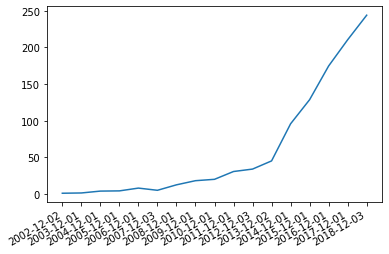

In [27]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['total'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

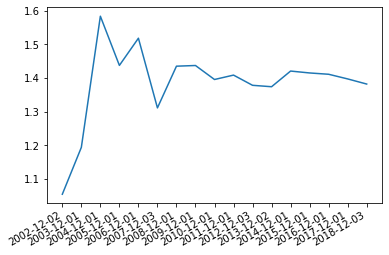

In [28]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['cagr'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

In [29]:
df_account

,start_date,end_date,filepath,stocks,yield,yields,total,cagr,win_rate,best_corp,worst_corp,best_stock_code,worst_stock_code
0,2002-12-02,2003-12-01,data/daily/12-1/2002-12-02.csv,"[027040, 010600, 003230, 022220, 014570, 00532...",1.053623,"[5.926470588235294, 0.8788990825688073, 0.6531...",1.053623,1.053623,0.266667,5.926471,0.000000,027040,022220
1,2003-12-01,2004-12-01,data/daily/12-1/2003-12-01.csv,"[010600, 003680, 025880, 003310, 014100, 00214...",1.351262,"[0.8079331941544885, 3.235294117647059, 0.6755...",1.423720,1.193198,0.433333,9.194139,0.000000,006090,007110
2,2004-12-01,2005-12-01,data/daily/12-1/2004-12-01.csv,"[017680, 010600, 000440, 060280, 038320, 03801...",2.790569,"[1.9802494802494803, 2.1136950904392764, 2.107...",3.972990,1.583820,0.966667,7.137500,0.412500,014100,003310
3,2005-12-01,2006-12-01,data/daily/12-1/2005-12-01.csv,"[017680, 010600, 068290, 008110, 046310, 04847...",1.074017,"[1.5249343832020998, 1.6992665036674817, 0.865...",4.267058,1.437249,0.566667,1.880165,0.113978,014470,009460
4,2006-12-01,2007-12-03,data/daily/12-1/2006-12-01.csv,"[068290, 025880, 000440, 016920, 012620, 00409...",1.890741,"[1.318421052631579, 1.75, 1.271393643031785, 1...",8.067901,1.518281,0.666667,10.366748,0.161567,004090,032750
5,2007-12-03,2008-12-01,data/daily/12-1/2007-12-03.csv,"[017680, 010600, 068290, 006060, 083550, 03868...",0.628622,"[0.38427672955974845, 0.6296296296296297, 0.10...",5.071660,1.310766,0.133333,2.277092,0.052836,024950,021050
6,2008-12-01,2009-12-01,data/daily/12-1/2008-12-01.csv,"[011080, 044380, 065060, 088790, 017680, 03548...",2.470221,"[1.319672131147541, 2.4038461538461537, 3.0857...",12.528120,1.434963,1.000000,6.532508,1.164384,053450,031330
7,2009-12-01,2010-12-01,data/daily/12-1/2009-12-01.csv,"[011080, 017680, 010470, 033280, 088790, 00798...",1.451309,"[0.8695652173913043, 1.5081521739130435, 1.433...",18.182173,1.436997,0.833333,3.344086,0.160648,039440,011300
8,2010-12-01,2011-12-01,data/daily/12-1/2010-12-01.csv,"[011080, 033340, 011090, 079650, 005360, 01279...",1.102515,"[0.86, 1.1904761904761905, 1.230379746835443, ...",20.046122,1.395308,0.500000,2.207792,0.081154,005360,024940
9,2011-12-01,2012-12-03,data/daily/12-1/2011-12-01.csv,"[011080, 038320, 000520, 024940, 066130, 04631...",1.531969,"[1.9850498338870433, 0.0, 1.0035087719298246, ...",30.710035,1.408407,0.900000,4.386189,0.000000,031860,038320


In [30]:
df_account.to_csv('log/' + MODEL_NAME + '-' + os.path.basename(DATA_DIR) + '.csv', index=False)